# Stats lab Schoeder and Epley 2015 Study 4.csv

# Dowload data from https://drive.google.com/file/d/0Bz-rhZ21ShvOei1MM24xNndnQ00/view for analysis.

### Stats labs presents published data for the paper above for analysis by independnt t-tests. Here the data is used to demonstrate anaysis on statically signifcant findings using Baeysian estimation methods.

## stats lab  
### STUDY DESCRIPTION
### Imagine you were a job candidate trying to pitch your skills to a potential employer. Would you be more likely to get the job after giving a short speech describing your skills, or after writing a short speech andhaving a potential employer read those words? That was the question raised by Schroeder and Epley(2015). The authors predicted that a person’s speech (i.e., vocal tone, cadence, and pitch) communicatesinformation about their intellect better than their written words (even if they are the same words as inthe speech).To examine this possibility, the authors randomly assigned 39 professional recruiters for Fortune 500 companies to one of two conditions. In the audio condition, participants listened to audio recordings of ajob candidate’s spoken job pitch. In the transcript condition, participants read a transcription of the jobcandidate’s pitch. After hearing or reading the pitch, the participants rated the job candidates on threedimensions: intelligence, competence, and thoughtfulness. These ratings were then averaged to create a single measure of the job candidate’s intellect, with higher scores indicating the recruiters rated thecandidates as higher in intellect. The participants also rated their overall impression of the job candidate(a composite of two items measuring positive and negative impressions). Finally, the participants indicated how likely they would be to recommend hiring the job candidate (0 - not at all likely, 10 - extremely likely).


# Import python libraries for Bayesian estimation of two independent means.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np 
import pandas as pd
import pystan as ps
import arviz as az

#Set working dircetory to wherever data is saved on local machine.

os.chdir(r"\Users\harri\OneDrive\Documents\Stats 2")

In [3]:
#Read CSV into Jupyter notebook.

df = pd.read_csv("Schroeder and Epley 2015 Study 4 data.csv")
df.head()

,CONDITION,compt,thought,intell,like,pos,neg,hire,age,gender,...,pnum,meanhire,meanintellect,meanimpression,centhire,centintellect,centimpression,Intellect_Rating,Impression_Rating,Hire_Rating
0,1,7,7,7,7,7,1,7,29,2,...,1,4.583333,5.722222,6.638889,2.416667,1.277778,1.361111,6.000000,7.000000,6
1,1,6,8,6,6,6,6,5,27,2,...,2,4.666667,5.577778,5.777778,0.333333,1.088889,-0.111111,5.666667,4.666667,4
2,1,7,8,6,9,9,1,6,27,2,...,3,4.666667,5.577778,5.777778,1.333333,1.422222,3.555556,6.000000,8.333333,5
3,0,4,3,6,6,6,6,5,40,2,...,4,4.583333,5.722222,6.638889,0.416667,-1.388889,-0.972222,3.333333,4.666667,4
4,0,2,3,1,2,2,8,2,32,2,...,5,4.583333,5.722222,6.638889,-2.583333,-3.722222,-4.305556,1.000000,1.333333,1


In [4]:
#Subseting data frame for the audio condition. 

Audio = df[df["CONDITION"] == 1]
Audio.head()

,CONDITION,compt,thought,intell,like,pos,neg,hire,age,gender,...,pnum,meanhire,meanintellect,meanimpression,centhire,centintellect,centimpression,Intellect_Rating,Impression_Rating,Hire_Rating
0,1,7,7,7,7,7,1,7,29,2,...,1,4.583333,5.722222,6.638889,2.416667,1.277778,1.361111,6.000000,7.000000,6
1,1,6,8,6,6,6,6,5,27,2,...,2,4.666667,5.577778,5.777778,0.333333,1.088889,-0.111111,5.666667,4.666667,4
2,1,7,8,6,9,9,1,6,27,2,...,3,4.666667,5.577778,5.777778,1.333333,1.422222,3.555556,6.000000,8.333333,5
6,1,5,4,5,4,2,6,2,29,2,...,7,5.416667,5.888889,5.944444,-3.416667,-1.222222,-2.277778,3.666667,2.666667,1
8,1,6,6,6,4,4,3,4,28,2,...,9,4.666667,5.577778,5.777778,-0.666667,0.422222,-0.444444,5.000000,4.333333,3


In [5]:
#Subseting data frame for the transcript condition. 

Transcript = df[df["CONDITION"] == 0]

array([3.33333333, 1.        , 2.        , 1.66666667, 3.66666667,
       5.66666667, 3.66666667, 0.66666667, 4.66666667, 3.66666667,
       7.        , 1.66666667, 6.33333333, 3.66666667, 3.33333333,
       2.33333333, 4.66666667, 6.66666667])

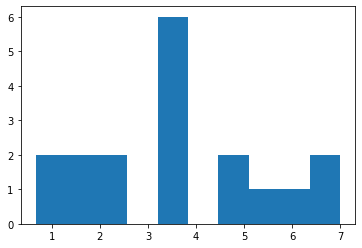

In [6]:
#Plot Histogram (needs to be formatted nicer)

plt.hist(Transcript["Intellect_Rating"]);
plt.show

#Extracting Intellect_rating from the subest data set of transcript condition dataframe,
#and then convert to numpy array fro input to stan model.

T_Intellect = Transcript["Intellect_Rating"].to_numpy()
T_Intellect

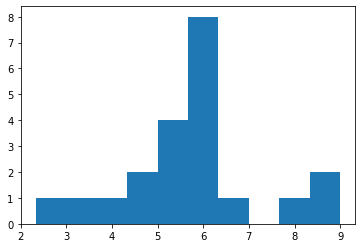

In [7]:
#Plot Histogram (needs to be formatted nicer)

plt.hist(Audio["Intellect_Rating"]);
plt.show
A_Intellect = Audio["Intellect_Rating"].to_numpy()

### Between subject Bayseain estimation of means using Stan. Simplest model Estimating just the Means and difference of two independent groups, with default prior on the all the estiated parameters. this presents a completely ignorant postion on the data, leading to similar results as maximum lilhood estimation. (Note to self find realistic priors for suc an analysis).
# $$y_{1} \sim {\sf N(\mu,\sigma)}$$ $$y_{2} \sim {\sf N(\mu_{1},\sigma)}$$$$\mu_{1}\sim U(-\infty,+\infty)$$$$\mu_{2}\sim U(-\infty,+\infty)$$$$\sigma\sim U(-\infty,+\infty) $$


In [73]:
#Stan code for mean estiation model witn nomal likl
Intellect_Model_t = """

data {
  int<lower=0> N1;  // # of observations (Audio)
  int<lower=0> N2;  // # of observations (Transcript)
  vector[N1] Y1;  // Intelligence rating (Audio)
  vector[N2] Y2;  // Intelligence rating (Transcript)
}

parameters {
  real mu_1;  //
  real mu_2;  // 
  real<lower=0> sigma; // pooled standard deviation
}

model {
// likelihood
  Y1 ~ normal(mu_1, sigma);
  Y2 ~ normal(mu_2, sigma);
}

generated quantities {
  real cohen_d = (mu_2 - mu_1) / sigma; //effect size;
}

"""

In [74]:
#Python dictionary formating the data to pass into stan.

Intellect_Model_t_dat = {'N1': len(A_Intellect) ,
               'N2': len(T_Intellect),
               'Y1': A_Intellect,
               'Y2': T_Intellect}

fit_Intellect_diff = ps.stan(model_code = Intellect_Model_t, data = Intellect_Model_t_dat, iter=2000, chains=4)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_02f494c216c4d6b6ab2bd273ed6c29ba NOW.


In [75]:
print(fit_Intellect_diff)

Inference for Stan model: anon_model_02f494c216c4d6b6ab2bd273ed6c29ba.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu_1      5.63  6.9e-3   0.39   4.84   5.37   5.64   5.91   6.38   3250    1.0
mu_2      3.65  7.3e-3   0.42   2.83   3.37   3.64   3.92   4.48   3296    1.0
sigma     1.82  4.0e-3   0.22   1.44   1.66   1.79   1.96   2.32   3191    1.0
cohen_d  -1.11  5.8e-3   0.35  -1.82  -1.34   -1.1  -0.88  -0.43   3591    1.0
lp__    -41.39    0.03   1.23 -44.56 -41.94 -41.06 -40.51 -39.98   2052    1.0

Samples were drawn using NUTS at Wed Oct 28 12:48:27 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020881901E08>,
      dtype=object)

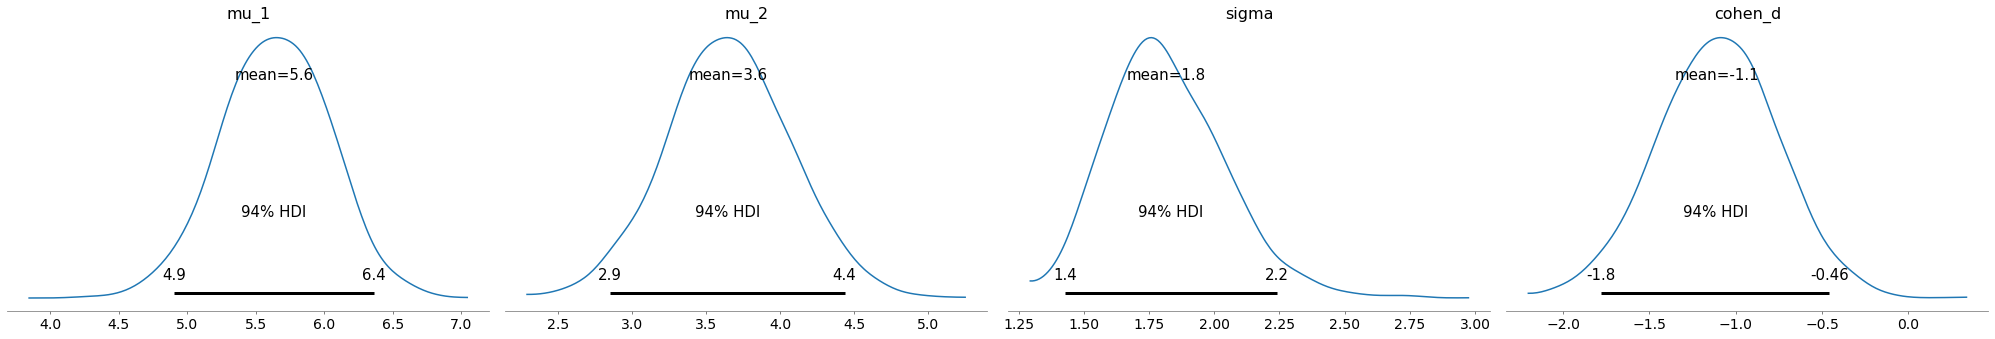

In [76]:
az.plot_posterior(fit_Intellect_diff)

# Highest density interval estimate for the standardised effect size (Cohen d) does not cross the 0 so the credibilty values suggest that Audio group got  higher mean intellect score rating from the professional revieiwers.

In [ ]:


#az.plot_trace(fit)

(array([2., 1., 1., 3., 0., 3., 3., 3., 2., 3.]),
 array([2.33333333, 2.96666667, 3.6       , 4.23333333, 4.86666667,
        5.5       , 6.13333333, 6.76666667, 7.4       , 8.03333333,
        8.66666667]),
 <a list of 10 Patch objects>)

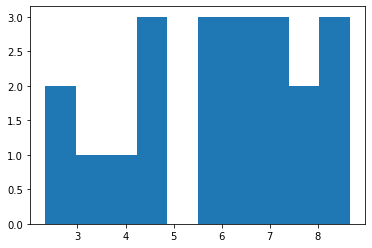

In [82]:
A_Impression = Audio["Impression_Rating"].to_numpy()
plt.hist(A_Impression)

(array([2., 2., 1., 1., 1., 2., 2., 3., 1., 3.]),
 array([0.33333333, 1.03333333, 1.73333333, 2.43333333, 3.13333333,
        3.83333333, 4.53333333, 5.23333333, 5.93333333, 6.63333333,
        7.33333333]),
 <a list of 10 Patch objects>)

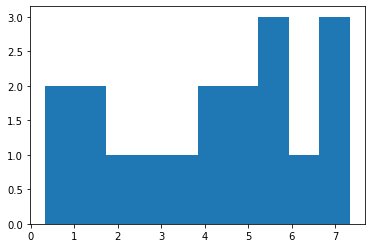

In [83]:
T_Impression = Transcript["Impression_Rating"].to_numpy()
plt.hist(T_Impression)

# Stan Model code for estimating two independnent means and pooled Standard devation for estimating effect size (Cohen d). Using Default priors. By using these default priors results are simlar to maximum liklihoodestimation analysis.

### $$y_{1} \sim {\sf N(\mu,\sigma)}$$ $$y_{2} \sim {\sf N(\mu,\sigma)}$$$$\mu\sim U(-\infty,+\infty)$$$$\mu\sim U(-\infty,+\infty)$$$$\sigma\sim U(-\infty,+\infty) $$

In [87]:
Impression_Model_t = """

data {
  int<lower=0> N1;  // # of observations (Audio)
  int<lower=0> N2;  // # of observations (Transcript)
  vector[N1] Y1;  // Impression rating (Audio)
  vector[N2] Y2;  // Impression rating (Transcript)
}

parameters {
  real mu_1;  //
  real mu_2;  // 
  real<lower=0> sigma; // pooled standard deviation
}

model {

//likelihood 
  Y1 ~ normal(mu_1, sigma);
  Y2 ~ normal(mu_2, sigma);
}

generated quantities {
  real cohen_d = (mu_2 - mu_1) / sigma; //effect size;
}

"""

In [88]:
Impression_Model_t_dat = {'N1': len(A_Impression) ,
               'N2': len(T_Impression),
               'Y1': A_Impression,
               'Y2': T_Impression}

fit_Impression_diff = ps.stan(model_code = Impression_Model_t, data = Impression_Model_t_dat, iter=2000, chains=4)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5ab3d123523aa029cc55bf87cd11da8e NOW.


In [89]:
print(fit_Impression_diff)

Inference for Stan model: anon_model_5ab3d123523aa029cc55bf87cd11da8e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu_1      5.97  8.1e-3   0.47   5.03   5.66   5.97   6.28   6.91   3389    1.0
mu_2      4.07  8.6e-3   0.51   3.08   3.72   4.06   4.41   5.07   3477    1.0
sigma     2.14  5.2e-3   0.26   1.71   1.96   2.12    2.3   2.74   2546    1.0
cohen_d   -0.9  5.7e-3   0.33  -1.55  -1.12   -0.9  -0.67  -0.24   3371    1.0
lp__    -47.68    0.03   1.26 -50.95 -48.24 -47.35 -46.75 -46.23   1680    1.0

Samples were drawn using NUTS at Wed Oct 28 13:01:58 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


# Highest density interval estimate for the standardised effect size (Cohen d) does not cross the 0 so the credibilty values suggest that Audio group got  higher mean impression score rating from the professional reviewers.

## (Need to learn how to conduct prior predtive checks and posterior predictive checks with python/pystan.). aditonally thsdat i snot mornally distributed (by eye on the histograms), this will need to be to deal with bayesian methods but I need to learn it.